In [2]:
#importing the important library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
#we are going to use image datasets for this CNN
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalize pixel values to be between 0 and 1
train_image, test_images = train_images/255.0, test_images / 255.0

170498071/170498071 [==============================] - 7s 0us/step


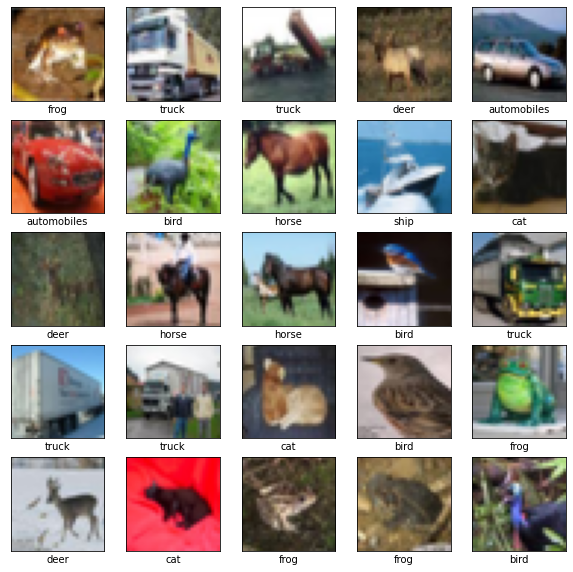

In [6]:
##Verify the dataset
class_names = ["airplanes", "automobiles", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  #the CIFAR labels happen to be arrays
  #which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
## Let's create convolutional neural network 
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [12]:
#Add dense layers on top
model.add(layers.Flatten())

In [14]:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [17]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 0.6963 - accuracy: 0.7591 - val_loss: 3.3493 - val_accuracy: 0.1033
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6586 - accuracy: 0.7720 - val_loss: 3.2117 - val_accuracy: 0.1005
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6315 - accuracy: 0.7810 - val_loss: 3.3913 - val_accuracy: 0.1002
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6033 - accuracy: 0.7916 - val_loss: 3.3418 - val_accuracy: 0.1161
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5803 - accuracy: 0.7980 - val_loss: 3.5439 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.5680 - accuracy: 0.8041 - val_loss: 3.5597 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5463 - accuracy: 0.8117 - val_loss: 3.4688 -

313/313 - 5s - loss: 3.9338 - accuracy: 0.1000 - 5s/epoch - 15ms/step


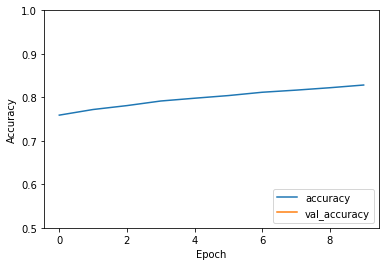

In [18]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =  2)

In [19]:
print(test_acc)

0.10000000149011612
